# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.dates as mdates

In [2]:
#Reading CSV dataset - ongoing_outbreaks_phu
df = pd.read_csv('ongoing_outbreaks_phu.csv', index_col = 'date', parse_dates = True)
df.head()

,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks
date,,,,
2020-11-01,BRANT COUNTY,2227,4 Workplace,1
2020-11-01,BRANT COUNTY,2227,1 Congregate Care,2
2020-11-01,CHATHAM-KENT,2240,5 Recreational,1
2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1
2020-11-01,CHATHAM-KENT,2240,4 Workplace,1


In [3]:
#Grouping data on date and phu_num in order to find total outbreaks for a date in particular phu
summaryDF = df.groupby(['date','phu_num']).sum()
summaryDF.rename({'number_ongoing_outbreaks': 'total_in_phu'},axis=1, inplace =True)
summaryDF.head()

total_in_phu
date       phu_num              
2020-11-01 2227                3
           2230                8
           2233                1
           2234                2
           2235                1

In [4]:
#Adding the total outbreaks in phu column to the main dataframe
df1 = pd.merge(df,summaryDF,on=['date','phu_num'])
df1.head()

,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks,total_in_phu
date,,,,,
2020-11-01,BRANT COUNTY,2227,4 Workplace,1,3
2020-11-01,BRANT COUNTY,2227,1 Congregate Care,2,3
2020-11-01,CHATHAM-KENT,2240,5 Recreational,1,3
2020-11-01,CHATHAM-KENT,2240,6 Other/Unknown,1,3
2020-11-01,CHATHAM-KENT,2240,4 Workplace,1,3


In [5]:
max_cases_num = df1['total_in_phu'].max()
print('The maximum number of cases per day ever recorded in Ontario is {}'.format(max_cases_num))

The maximum number of cases per day ever recorded in Ontario is 238


In [6]:
#Filtering complete data to see which Phu on which date had the highest number of covid cases reported
df1[df1.total_in_phu == max_cases_num]

,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks,total_in_phu
date,,,,,
2021-04-11,TORONTO,3895,5 Recreational,6,238
2021-04-11,TORONTO,3895,4 Workplace,52,238
2021-04-11,TORONTO,3895,3 Education,119,238
2021-04-11,TORONTO,3895,2 Congregate Living,34,238
2021-04-11,TORONTO,3895,1 Congregate Care,27,238


# Conclusion 1:
The maximum number of Covid cases per day ever recorded in Ontario province is 

238 Cases in "Toronto" on 11th of February 2021


In [7]:
#Filtering the dataset to start from September-2021 to today

filtered = df1.loc['20210901':date.today().strftime('%Y%m%d')]
filtered.head()

,phu_name,phu_num,outbreak_group,number_ongoing_outbreaks,total_in_phu
date,,,,,
2021-09-01,ALGOMA DISTRICT,2226,4 Workplace,2,3
2021-09-01,ALGOMA DISTRICT,2226,6 Other/Unknown,1,3
2021-09-01,BRANT COUNTY,2227,1 Congregate Care,3,3
2021-09-01,CHATHAM-KENT,2240,6 Other/Unknown,1,1
2021-09-01,CITY OF HAMILTON,2237,2 Congregate Living,2,17


(array([18871., 18885., 18901., 18915., 18932., 18946., 18962.]),
 [Text(18871.0, 0, '2021-09-01'),
  Text(18885.0, 0, '2021-09-15'),
  Text(18901.0, 0, '2021-10-01'),
  Text(18915.0, 0, '2021-10-15'),
  Text(18932.0, 0, '2021-11-01'),
  Text(18946.0, 0, '2021-11-15'),
  Text(18962.0, 0, '2021-12-01')])

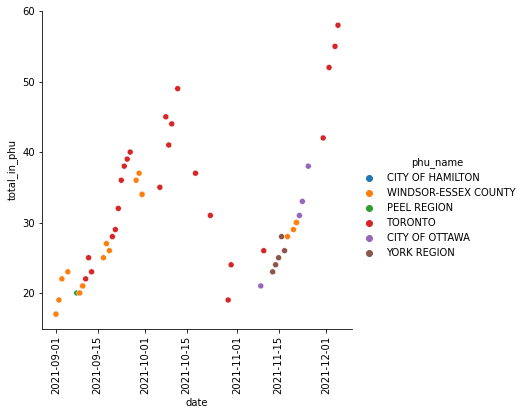

In [8]:
#Filtering dataframe to filter rows having maximum total outbreak cases on date
grouped_with_dups = filtered[filtered.groupby('date').total_in_phu.transform('max') == filtered['total_in_phu']]

#Dropping the duplicates
grouped = grouped_with_dups[['phu_name','total_in_phu']].drop_duplicates()

#plotting realational plot between date and total cases in phu with hues on region names
sns.relplot(x='date',y = 'total_in_phu', data=grouped, kind='scatter', hue='phu_name')
plt.xticks(rotation = 'vertical')

# Conclusion 2 :
The plot signifies which region/phu has had maximum outbreaks. We can see that Toronto has the most number of outbreaks amongst all places in ontario

(array([18871., 18885., 18901., 18915., 18932., 18946., 18962.]),
 [Text(18871.0, 0, '2021-09-01'),
  Text(18885.0, 0, '2021-09-15'),
  Text(18901.0, 0, '2021-10-01'),
  Text(18915.0, 0, '2021-10-15'),
  Text(18932.0, 0, '2021-11-01'),
  Text(18946.0, 0, '2021-11-15'),
  Text(18962.0, 0, '2021-12-01')])

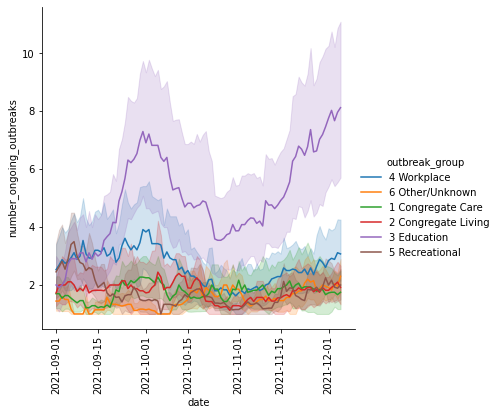

In [9]:
#Relational plot between number of outbreaks on dates 

sns.relplot(x='date',y='number_ongoing_outbreaks',data=filtered,kind='line',hue='outbreak_group')
plt.xticks(rotation = 'vertical')

# Conclusion 3:
In Ontario, Education group has most number of outbreaks

In [10]:
#pandas reading another csv file containing sub grouped data on outbrak groups
outbreak_group_csv = pd.read_csv('outbreak_cases.csv', index_col = 'date', parse_dates = True)
education_group_csv = outbreak_group_csv[outbreak_group_csv['category_grouped'] == '3 Education'].sort_values(by = 'date', ascending =False)
education_outbreak = education_group_csv[date.today().strftime('%Y%m%d'):'20210901']
education_outbreak.head()

,category_grouped,outbreak_subgroup,TOTAL_CASES
date,,,
2021-12-04,3 Education,SCHOOL - ELEMENTARY,8
2021-12-04,3 Education,CHILD CARE,2
2021-12-03,3 Education,SCHOOL - SECONDARY,3
2021-12-03,3 Education,SCHOOL - ELEMENTARY,42
2021-12-02,3 Education,SCHOOL - SECONDARY,4


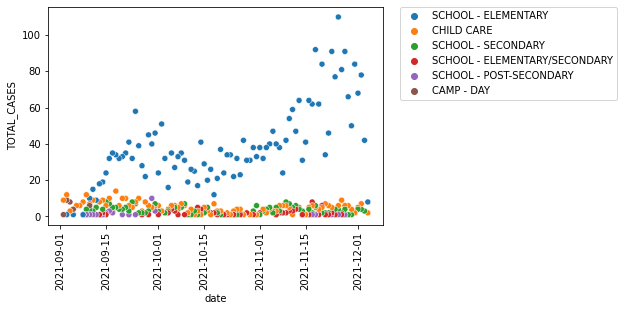

In [11]:
#Scatterplot to get insights on which Education subgroup is contributing to realtively more outbreaks
sns.scatterplot(x='date',y='TOTAL_CASES',data=education_outbreak,hue='outbreak_subgroup')
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

# Conclusion 4: 
In Education outbreak group, we can see that Elementary kids are being effected.

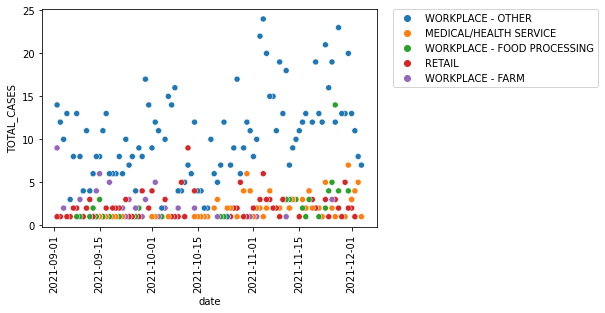

In [12]:
#Scatterplot to get insights on which workplace subgroup is having most outbreaks
workplace_group_csv = outbreak_group_csv[outbreak_group_csv['category_grouped'] == '4 Workplace'].sort_values(by = 'date', ascending =False)
workplace_group_csv = workplace_group_csv[date.today().strftime('%Y%m%d'):'20210901']
workplace_group_csv.head()

sns.scatterplot(x='date',y='TOTAL_CASES',data=workplace_group_csv,hue='outbreak_subgroup')
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

# Conclusion 5:
in worksplace group we can see that Other Category has the highest number of cases